[TITLE]
What is the project about

The goal of the project is to determine the indicators of heavy traffic on I-94(Westbound).

In [1]:
import pandas as pd
import datetime as dt

mit = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
mit.head(5)
mit.tail(5)
mit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


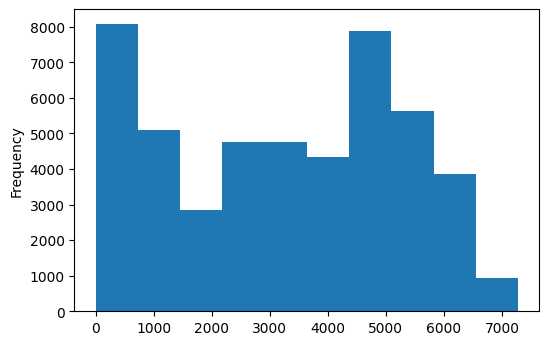

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
mit['traffic_volume'].plot.hist()
plt.show()

mit['traffic_volume'].describe()

In [3]:
mit['date_time']= pd.to_datetime(mit['date_time'])
daytime = mit.copy()[(mit['date_time'].dt.hour >= 7) & (mit['date_time'].dt.hour <19)]
nighttime = mit.copy()[(mit['date_time'].dt.hour >= 19) | (mit['date_time'].dt.hour < 7)]

print(daytime.shape)
print(nighttime.shape)

(23877, 9)
(24327, 9)


we extract the daytime (7-19) and nightime(19-7) from the original dataset and divided them into two sets. According to the calculation, nighttime has 450 more rows than the daytime. Later on, we'll plot two graphs illustrating the differences of traffic volumes in the daytime and nighttime.

Text(0.5, 1.0, 'nighttime')

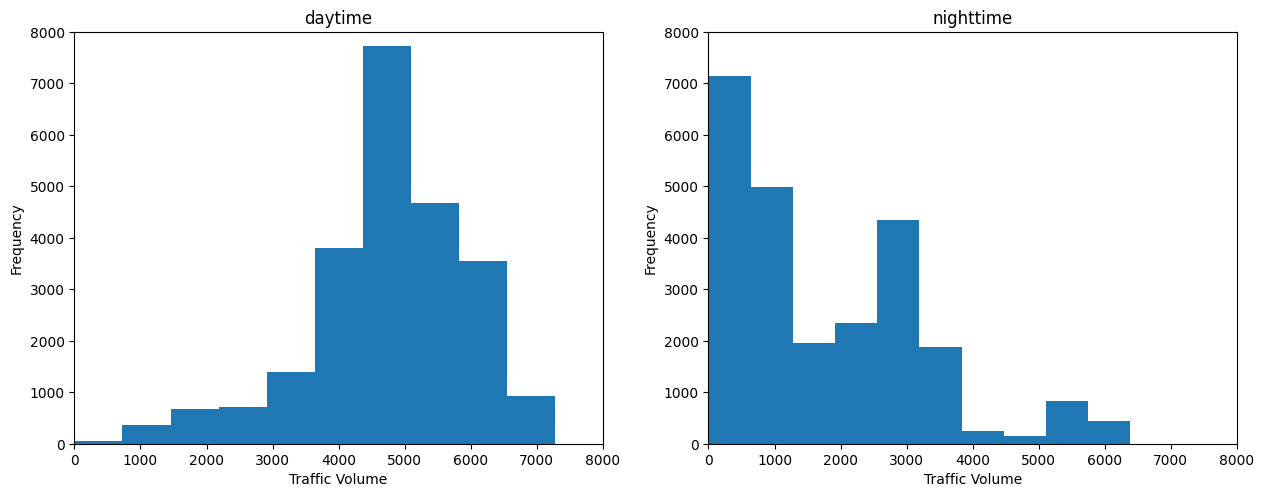

In [4]:
#plot a graph that contains both daytime and nighttime graphs

plt.figure(figsize = (15,12))

#daytime
plt.subplot(2,2,1)
plt.hist(daytime['traffic_volume'])
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.title("daytime")

#nighttime
plt.subplot(2,2,2)
plt.hist(nighttime['traffic_volume'])
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.title("nighttime")

In [5]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram and statistical results show the similarities and differences between daytime and nighttime.
similarity: Mean values are less than 50%
difference: bigger values are more frquently appeared during daytime than nighttime.

In [7]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

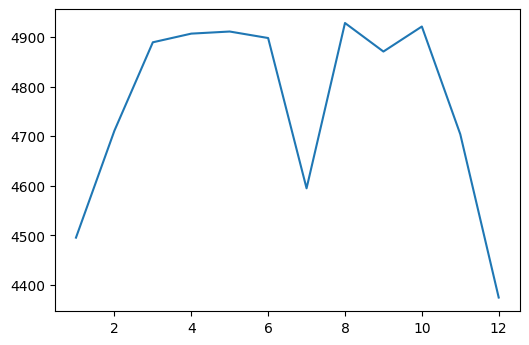

In [8]:
plt.plot(by_month['traffic_volume'])

Telling from the line plot, we saw a peak of heavy traffic from March to June, from August to September and from October to November. The traffic is rather low during the winter, as we could see it drops to the bottom in December and January.

In [9]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

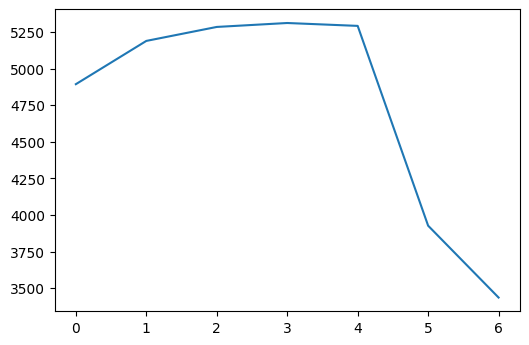

In [10]:
plt.plot(by_dayofweek['traffic_volume'])

According to the 'day of week' line graph, traffic is usually busy during workdays, and it sees a dramatic decrease when the Friday come.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [11]:
daytime['hour'] = daytime['date_time'].dt.hour
business_day = daytime.copy()[daytime['dayofweek'] <= 4]
# 4 means Friday here
weekend = daytime.copy()[daytime['dayofweek'] >= 5]
# 5 means Friday here
by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend =  weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


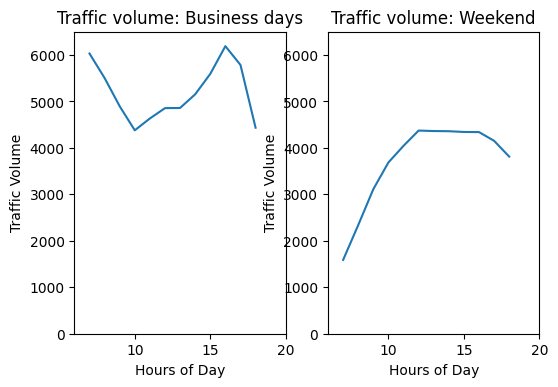

In [36]:
plt.plot(figsize = (15,18))

#hour_by_business
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylabel("Traffic Volume")
plt.xlabel("Hours of Day")
plt.xlim(6, 20)
plt.ylim(0,6500)
plt.title('Traffic volume: Business days')

#hour_by_weekend
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylabel("Traffic Volume")
plt.xlabel("Hours of Day")
plt.xlim(6, 20)
plt.ylim(0,6500)
plt.title('Traffic volume: Weekend')
plt.show()

As we could tell from two graphs, rush hour for business days are from 6 to 10 and 17 to 19; for weekend are from 12 to 15.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather:

In [18]:
daytime.copy().corr()[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
month,-0.022337,0.222072,0.001176,0.026768,0.000595
dayofweek,-0.416453,0.000188,-0.009683,-0.008814,-0.041980
hour,0.172704,0.162691,0.008279,0.003923,0.023685


Temperature (temp) shows to have greatest correlation with traffic volume(traffic_volume), so we'll try to plot a scatter plot to take a closer look of its correlation.

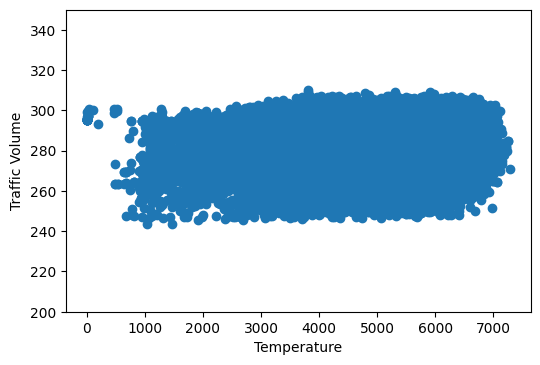

In [21]:
plt.scatter(daytime['traffic_volume'],daytime['temp'])
plt.ylabel('Traffic Volume')
plt.xlabel('Temperature')
plt.ylim(200,350)
plt.show()

The scatter  plot does not show particular correlation between traffic volume and temperature. 

In [23]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

print(by_weather_main)
print(by_weather_description)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

Text(0.5, 0, 'traffic volume')

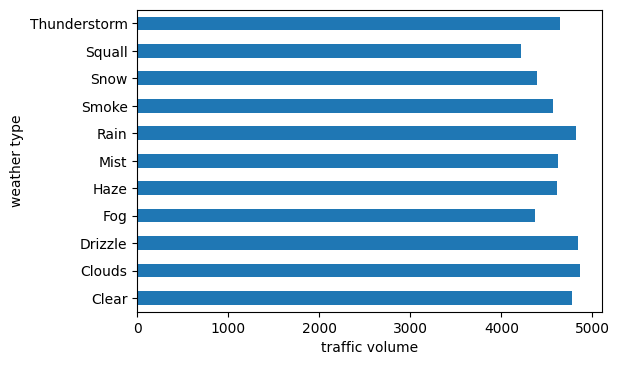

In [33]:
by_weather_main['traffic_volume'].plot.barh()
plt.ylabel('weather type')
plt.xlabel('traffic volume')

According to the bar graph, there's no line that exceeds traffic volume over 5000. Thurderstorm, rain, drizzle and clouds tend to have heavier traffic.

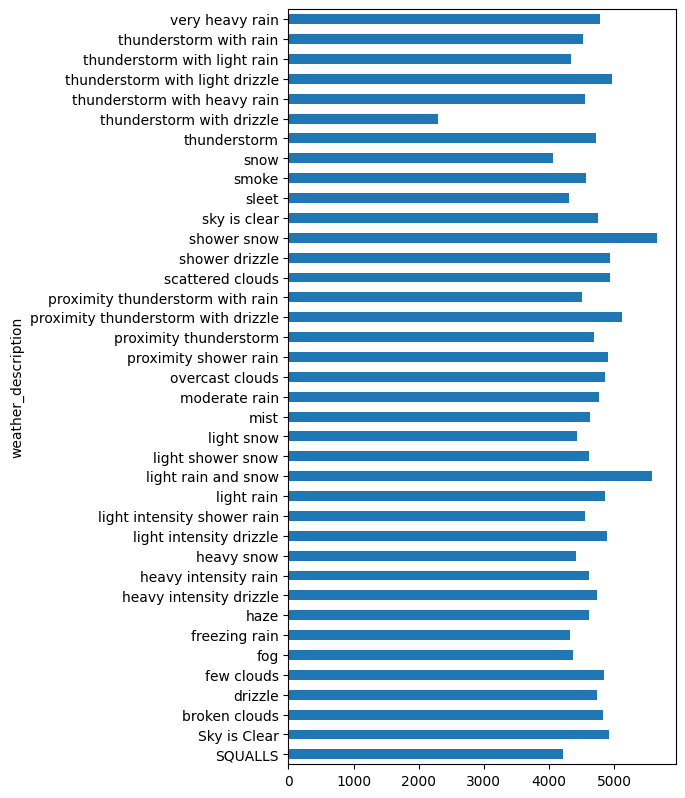

In [30]:
by_weather_description['traffic_volume'].plot.barh(figsize= (5,10))

*Conclusion*

In this project, we analyzed the traffic dataset from the I-94 highway to find the main indicators that caused heavy traffic. 

In the end, we found that there are two major indicators that influenced the traffic volume on this highway, namely the time and weather. 

1. Time Indicators:
Business days tend to have busier traffic than weekends, and the rush hour is usuallt from 7am to 4pm.
Taking a bigger picture, warm months(March-Oct) has heavier traffic than cold months(Nov-Feb).
7am to 4pm on business days

2. Weather Indicators:
While the correlation between weather and traffic volume is relatively lower than the time indicators. Bad weather days tend to have heavier traffic, such as snow,light rainfall,thunderstorm with drizzle.